In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import data

In [ ]:
lm= pd.read_csv('/content/drive/MyDrive/Desktop/capacity calculation/lm_cap_project.csv')
fm= pd.read_csv('/content/drive/MyDrive/Desktop/capacity calculation/fm_cap_project.csv')
rts= pd.read_csv('/content/drive/MyDrive/Desktop/capacity calculation/rts_cap_project.csv')

In [ ]:
# lm['shipper_group'].unique()
# rts['last_mile_hub_name'].nunique()
fm['hub_name'].unique()

array(['HCM - Binh Thanh 1 - SOU - DP', 'HCM - District 10 - SOU - DP',
       'HCM - District 7 - SOU - DP', 'HCM - Go Vap A - SOU - DP',
       'HCM - Phu Nhuan - SOU - DP', 'HCM - Tan Binh 1 - SOU - DP',
       'HCM - Thu Duc - SOU - DP'], dtype=object)

In [ ]:
fm_columns = ['cal_date', 'shipper_group', 'hub_name', 'total_orders_kpi',
        'first_mile_cancelled_rate', 'first_attempt_ontime_rate_kpi','pu_success_ontime_rate']
lm_columns = ['cal_date', 'hub_name','shipper_group','attempt_day1_OTP',
      'succcess_day1_OTP','succcess_day2_OTP','succcess_day3_OTP','volume_of_ontime_KPI',]
fm= fm[fm_columns]
lm= lm[lm_columns]

In [ ]:
# +0.05*aggregated['succcess_day3_OTP']
aggregated1 = fm.merge(lm,how='left',on= ['cal_date','shipper_group','hub_name'],suffixes=('_fm', '_lm'))
aggregated = aggregated1.merge(rts,how='left',on=['cal_date','shipper_group','hub_name'])

In [ ]:
aggregated.info()
# rts.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2947 entries, 0 to 2946
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cal_date                       2947 non-null   object 
 1   shipper_group                  2947 non-null   object 
 2   hub_name                       2947 non-null   object 
 3   total_orders_kpi               2947 non-null   int64  
 4   first_mile_cancelled_rate      2947 non-null   float64
 5   first_attempt_ontime_rate_kpi  2947 non-null   float64
 6   pu_success_ontime_rate         2947 non-null   float64
 7   attempt_day1_OTP               2756 non-null   float64
 8   succcess_day1_OTP              2756 non-null   float64
 9   succcess_day2_OTP              2756 non-null   float64
 10  succcess_day3_OTP              2756 non-null   float64
 11  volume_of_ontime_KPI           2756 non-null   float64
 12  avg_pending_time_dest_hub      2739 non-null   f

### calculate score

In [ ]:
aggregated['total_volume']= aggregated['total_orders_kpi']+aggregated['volume_of_ontime_KPI']
aggregated['service_level']= 0.25*aggregated['first_attempt_ontime_rate_kpi']+0.05*aggregated['pu_success_ontime_rate']
+0.45*aggregated['attempt_day1_OTP']+0.05*aggregated['succcess_day1_OTP']
+0.1*(1-aggregated['rts_rate'])

In [ ]:
calculation=aggregated[['cal_date','shipper_group','hub_name','total_volume','service_level']]
calculation = calculation[calculation['total_volume'].isnull()==False]

In [ ]:
final=calculation.groupby(['cal_date','hub_name']).agg({'total_volume':'sum','service_level':'mean'}).reset_index()
final=final[final['service_level']>=0.9]
# final.info()

Text(0.5, 1.0, 'hub_name')

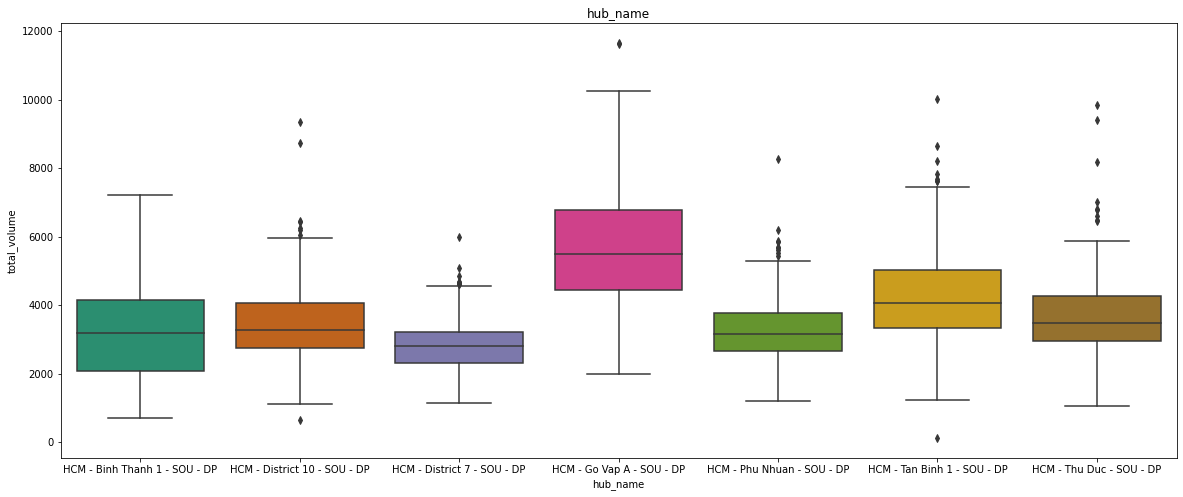

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(20,8),squeeze =False)
sns.boxplot(data=final,x='hub_name',y='total_volume',ax=ax1[0,0],palette='Dark2')
# sns.boxplot(data=df3,x='target',y='hub_region',ax=ax1[0,2],palette='Dark2')
ax1[0,0].set_title('hub_name')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

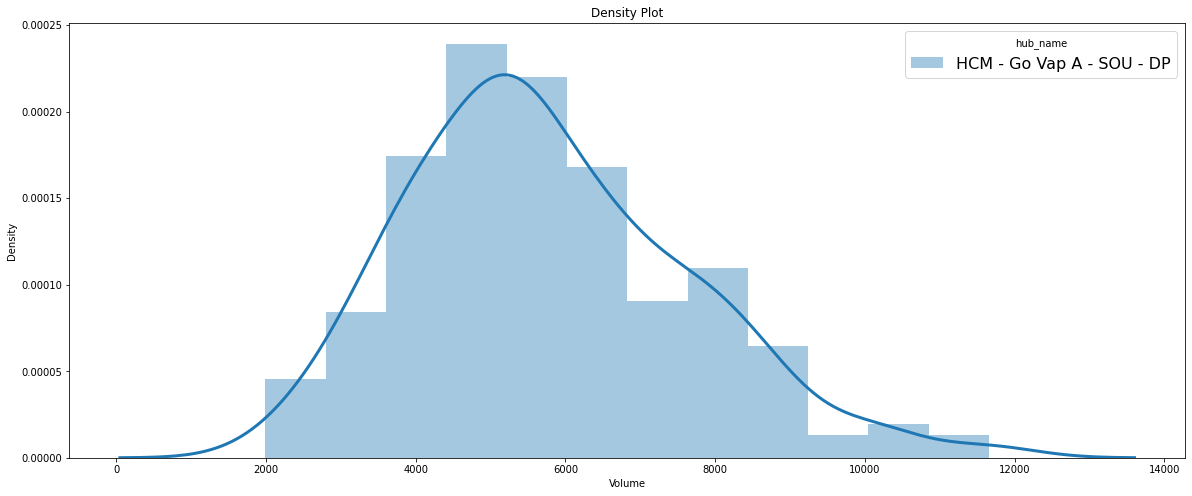

In [ ]:
# List of five airlines to plot
fig, ax1 = plt.subplots(1,1,figsize=(20,8),squeeze =False)
# ['HCM - Binh Thanh 1 - SOU - DP', 'HCM - District 10 - SOU - DP',
#        'HCM - District 7 - SOU - DP', 'HCM - Go Vap A - SOU - DP',
#        'HCM - Phu Nhuan - SOU - DP', 'HCM - Tan Binh 1 - SOU - DP',
#        'HCM - Thu Duc - SOU - DP']
# hub_name = final['hub_name'].unique()
hub_name = ['HCM - Go Vap A - SOU - DP']
# Iterate through the five airlines
for loop in hub_name:
    # Subset to the airline
    subset = final[final['hub_name'] == loop]
    
    # Draw the density plot
    sns.distplot(subset['total_volume'], hist = True, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loop)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'hub_name')
plt.title('Density Plot')
plt.xlabel('Volume')
plt.ylabel('Density')

In [ ]:
final.groupby('hub_name').agg('mean')

,total_volume,service_level
hub_name,,
HCM - Binh Thanh 1 - SOU - DP,3186.080214,0.960035
HCM - District 10 - SOU - DP,3435.096774,0.964169
HCM - District 7 - SOU - DP,2910.000000,0.955350
HCM - Go Vap A - SOU - DP,5700.790816,0.963132
HCM - Phu Nhuan - SOU - DP,3257.680000,0.967576
HCM - Tan Binh 1 - SOU - DP,4250.312849,0.963088
HCM - Thu Duc - SOU - DP,3754.829412,0.952081


In [ ]:
final['hub_name'].unique()

array(['HCM - Binh Thanh 1 - SOU - DP', 'HCM - District 10 - SOU - DP',
       'HCM - District 7 - SOU - DP', 'HCM - Go Vap A - SOU - DP',
       'HCM - Phu Nhuan - SOU - DP', 'HCM - Tan Binh 1 - SOU - DP',
       'HCM - Thu Duc - SOU - DP'], dtype=object)